# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis 

In [3]:
df = pd.read_csv('../data/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


In [6]:
df.shape

(200, 4)

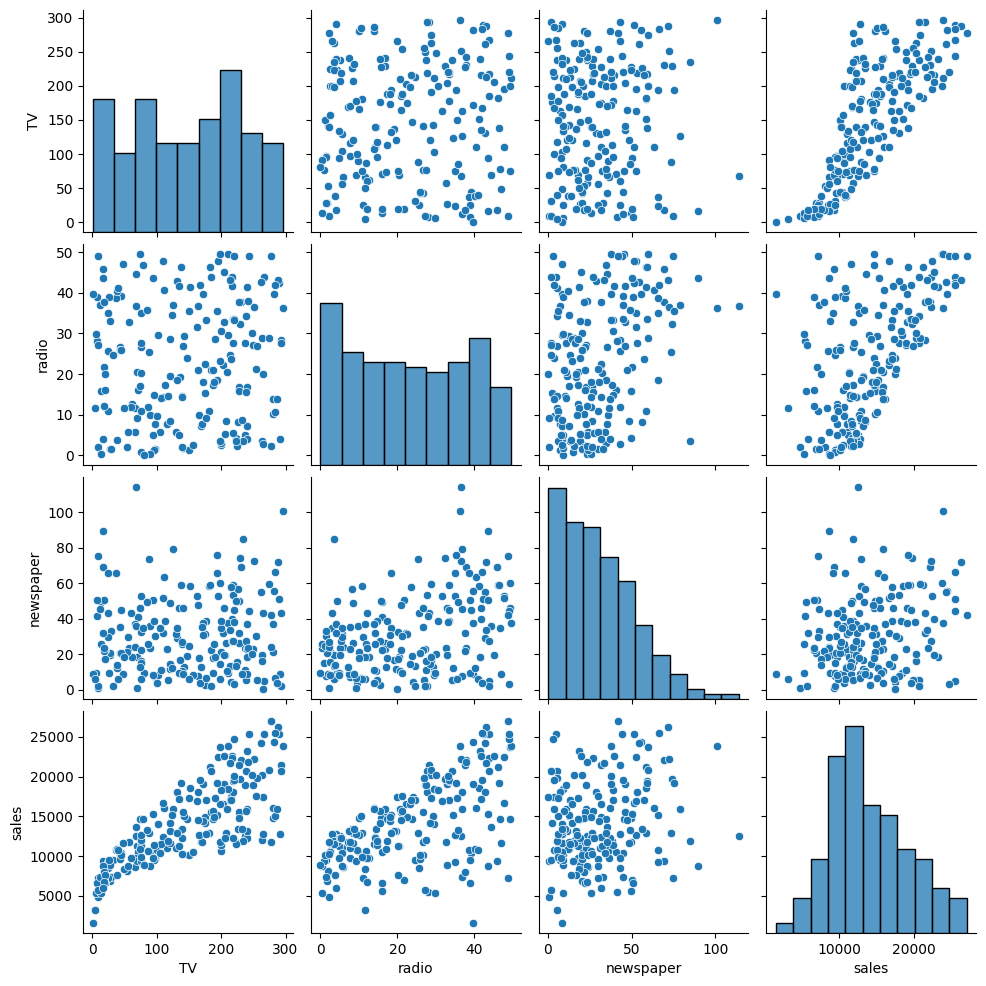

In [4]:
import seaborn as sns

sns.pairplot(df)

<AxesSubplot: >

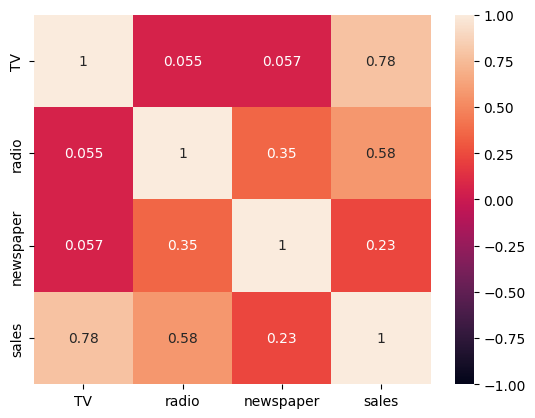

In [5]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [10]:
X = df.copy().drop(columns="sales")
y = df.copy()["sales"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

def train_linear_model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)

    from sklearn import metrics
    rmse = metrics.mean_squared_error(y_test, y_hat, squared=False)
    mae = metrics.mean_absolute_error(y_test, y_hat)
    r_2 = metrics.r2_score(y_test, y_hat)

    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2: {r_2:.4f}")

    return model, y_hat

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

alpha_lasso = 5000
alpha_ridge = 5000

d_models = {"Linear": LinearRegression(), 
            "Ridge": Ridge(alpha=alpha_ridge), 
            "Lasso": Lasso(alpha=alpha_lasso)}

d_trained_models = d_models.copy()

for name, model in d_models.items():
    print("\n\n", name, "\n")
    trained_model, _ = train_linear_model(X_train, y_train, X_test, y_test, model)
    d_trained_models.update({name: model})





 Linear 

RMSE: 2098.1226
MAE: 1361.7814
R2: 0.8601


 Ridge 

RMSE: 2038.2576
MAE: 1354.0771
R2: 0.8680


 Lasso 

RMSE: 2054.6317
MAE: 1343.6741
R2: 0.8659
